In [22]:
import imageio
import numpy as np
import matplotlib.pylab as plt
import skimage
import pandas as pd


from scipy import ndimage
from skimage.color import rgb2gray
from skimage.data import astronaut, coffee, cat, rocket, binary_blobs, brain, clock
from skimage import data

In [23]:
def Umbralize(img, umbral):
    
    img_grey = rgb2gray(img)
    
    h,w = img_grey.shape
    
    for y in range(h):
        for x in range(w):
            if img_grey[y,x] > umbral:
                img_grey[y,x] = 255
            else:
                img_grey[y,x] = 0
    
    return img_grey


In [24]:
def Dilate(img, K_size=3):
    
    h,w = img.shape
    
    # Zero padding
    pad = K_size//2
    out = np.zeros((h + 2*pad,w + 2*pad),dtype=float)
    out[pad:pad+h,pad:pad+w] = img.copy().astype(float)
    
    se = np.array([[255,255,255],[255,255,255],[255,255,255]])
    
    for y in range(h):
        for x in range (w):
            comparition = out[y:y+K_size,x:x+K_size] == se
            if comparition.any():
                out[y,x] = 255
    
    out = out[pad:pad+h,pad:pad+w].astype(np.uint8)
                
    return out


In [25]:
def Erosion(img, K_size=3):
    
    h,w = img.shape
    
    # Zero padding
    pad = K_size//2
    out = np.zeros((h + 2*pad,w + 2*pad),dtype=float)
    out[pad:pad+h,pad:pad+w] = img.copy().astype(float)
    
    se = np.array([[255,255,255],[255,255,255],[255,255,255]])
    
    for y in range(h):
        for x in range (w):
            comparition = out[y:y+K_size,x:x+K_size] == se
            if comparition.all():
                out[y,x] = 255
            else:
                out[y,x] = 0
    
    out = out[pad:pad+h,pad:pad+w].astype(np.uint8)
                
    return out

In [26]:
def Aperture(img):
    eroded = Erosion(img)
    dilated = Dilate(eroded)
    
    return dilated

In [27]:
def Closing(img):
    dilated = Dilate(img)
    eroded = Erosion(dilated)
    
    return eroded

In [28]:
def gradient(img):
    eroded = Erosion(img)
    dilated = Dilate(img)
    
    return eroded - dilated

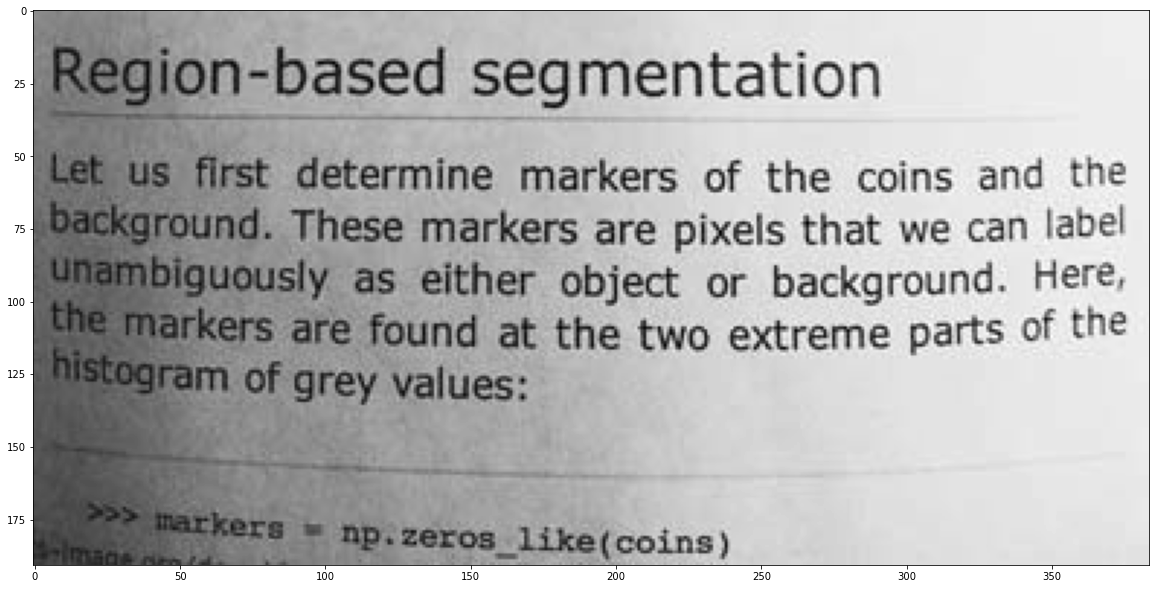

In [29]:
if __name__ == "__main__":
    
    # Read image
    #img = imageio.imread("christopher-20.jpg")
    img = data.page()
    # Add Noise
    #img_noise = add_salt_pepper(image=img, prob=0.05)
    
    # Display image
    plt.figure(figsize=(20,16))
    plt.imshow(img, cmap='gray')



<ipython-input-23-93d1ccdb41e4>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_grey = rgb2gray(img)


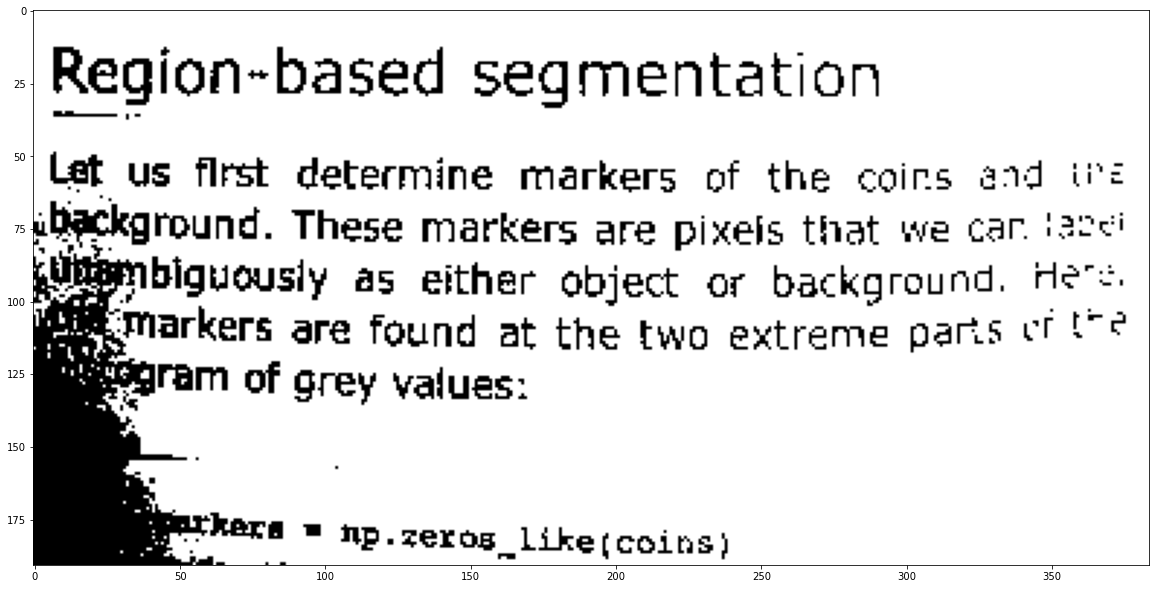

In [30]:
plt.figure(figsize=(20,16))
plt.imshow(Umbralize(img, 100), cmap='gray')
plt.show()

<ipython-input-23-93d1ccdb41e4>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_grey = rgb2gray(img)


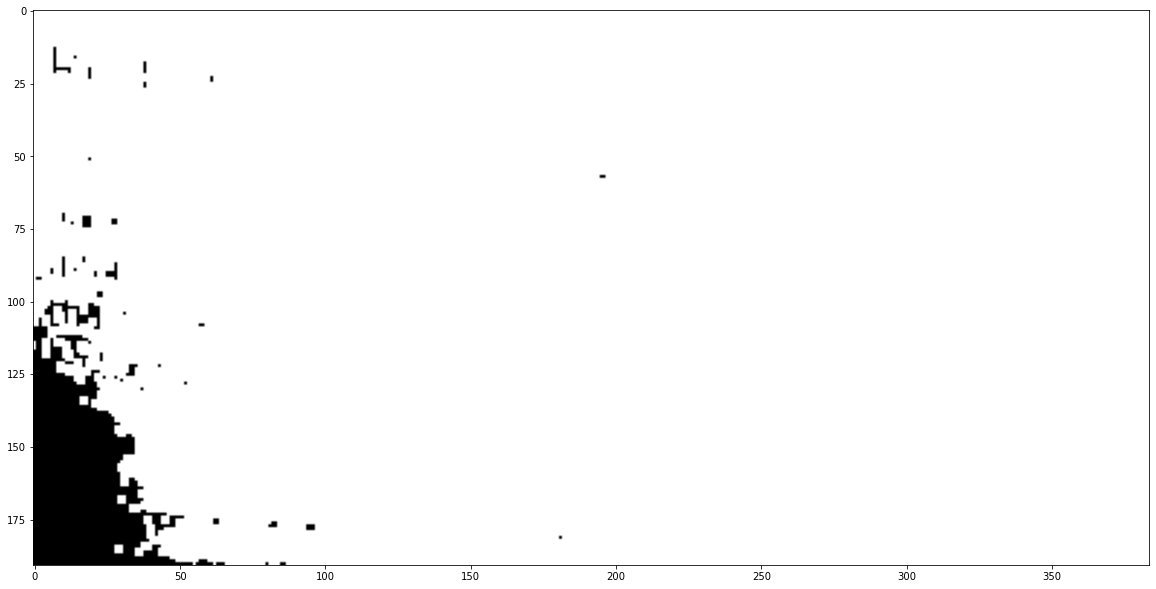

In [31]:
imge_grey = Umbralize(img, 127)
plt.figure(figsize=(20,16))
plt.imshow(Dilate(imge_grey), cmap='gray')
plt.show()

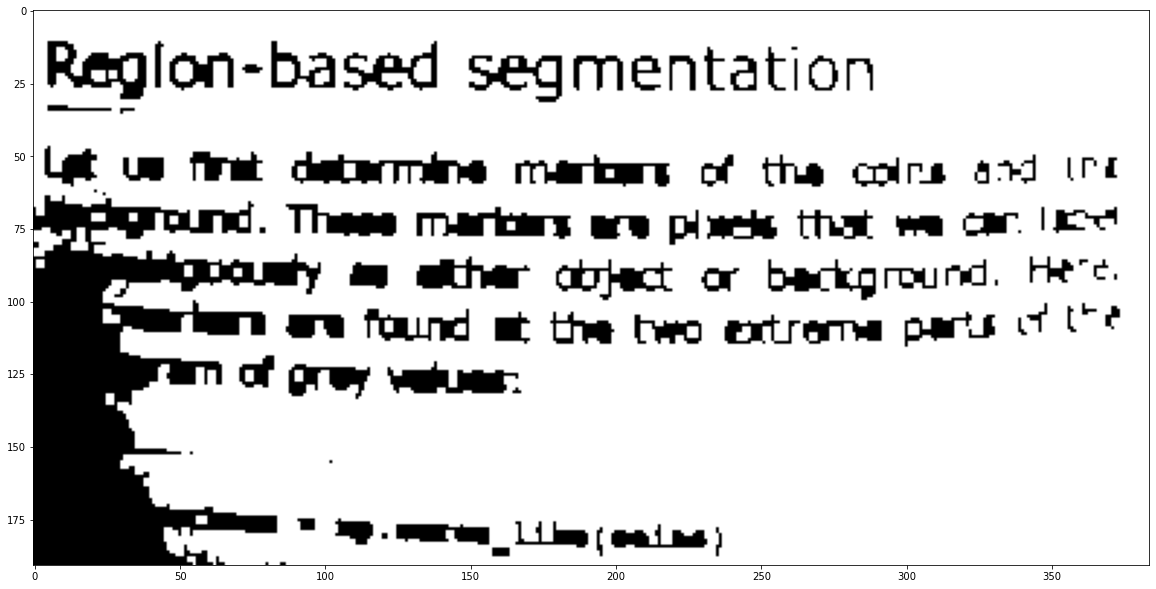

In [32]:
plt.figure(figsize=(20,16))
plt.imshow(Aperture(imge_grey), cmap='gray')
plt.show()

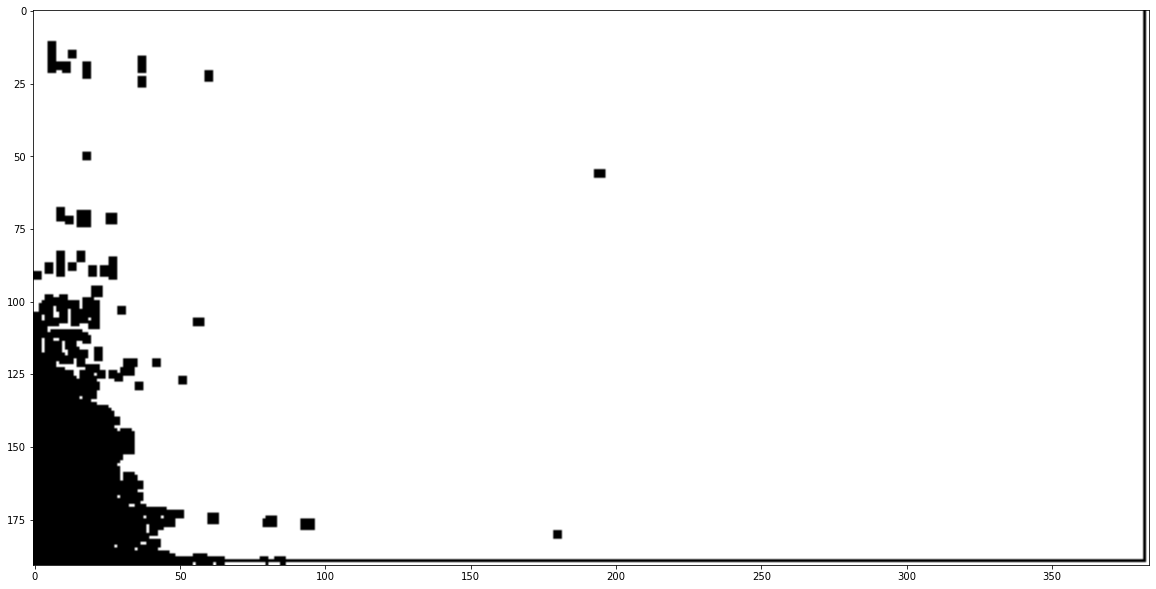

In [33]:
plt.figure(figsize=(20,16))
plt.imshow(Closing(imge_grey), cmap='gray')
plt.show()

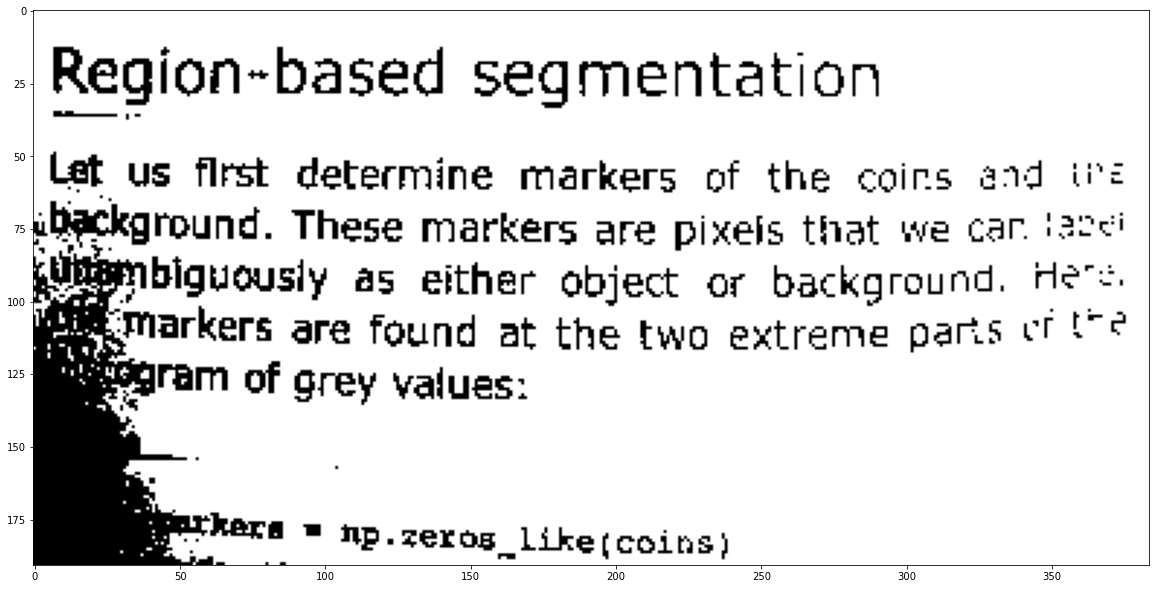

In [34]:
grad = gradient(imge_grey)
inverse = 255 - grad
blended = imge_grey/2 + grad/2
plt.figure(figsize=(20,16))
plt.imshow(blended, cmap='gray')
plt.show()